# Inspect dataset

In [1]:
%config InlineBackend.figure_format = 'jpg'  # smaller mem footprint for page

import das.npy_dir
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ncb.mplstyle')

In [2]:
ds = das.npy_dir.load('tutorial_dataset.npy')

## Print dataset information

In [3]:
print(ds)

Data:
   test:
      y_pulse: (4000001, 2)
      y_sine: (4000001, 2)
      x: (4000001, 1)
      y: (4000001, 3)
   train:
      y_pulse: (8090002, 2)
      y_sine: (8090002, 2)
      x: (8090002, 1)
      y: (8090002, 3)
   val:
      y_pulse: (4150001, 2)
      y_sine: (4150001, 2)
      x: (4150001, 1)
      y: (4150001, 3)

Attributes:
    class_names: ['noise', 'pulse', 'sine']
    class_names_pulse: ['noise', 'pulse']
    class_names_sine: ['noise', 'sine']
    class_types: ['segment', 'event', 'segment']
    class_types_pulse: ['segment', 'event']
    class_types_sine: ['segment', 'segment']
    filename_endsample_test: []
    filename_endsample_train: []
    filename_endsample_val: []
    filename_startsample_test: []
    filename_startsample_train: []
    filename_startsample_val: []
    filename_train: []
    filename_val: []
    samplerate_x_Hz: 10000
    samplerate_y_Hz: 10000
    filename_test: []



## Plot audio and annotations
Plot, for the train, validation, and test set:
- the audio
- the training targets as line plots
- the training targets as a pseudo-color plot (black - high probably, white - low probability).

Adjust the start and duration, `start_seconds` and `duration_seconds`, to plot a part of the recording that should have annotated song. 

Things to check:
- alignment between audio `x` and training targets `y`
- width of events is appropriate
- completeness of annotations

In the example below the `test` set is incompletely annotated around 3.5 seconds.

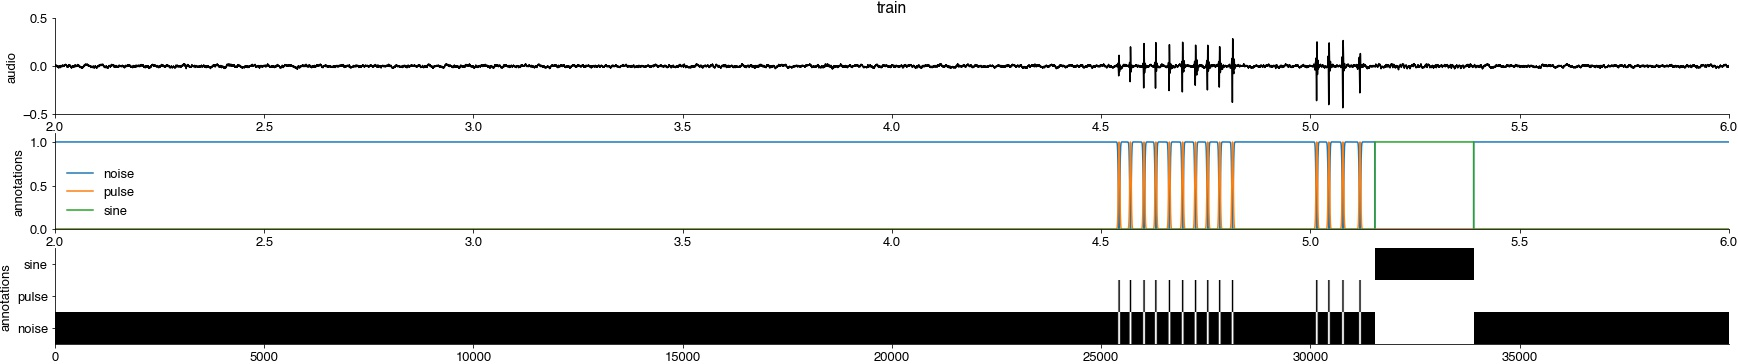

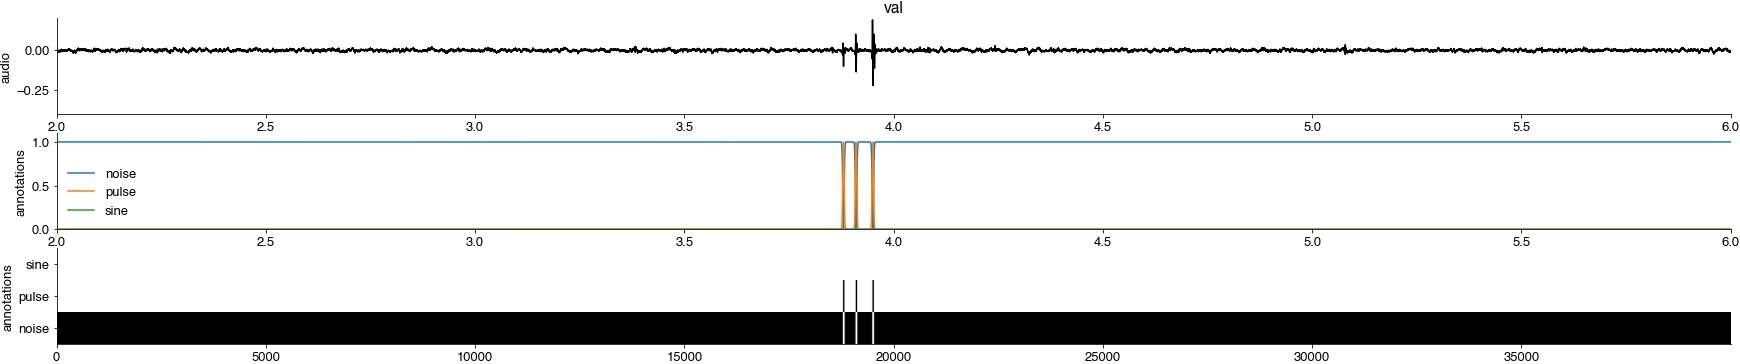

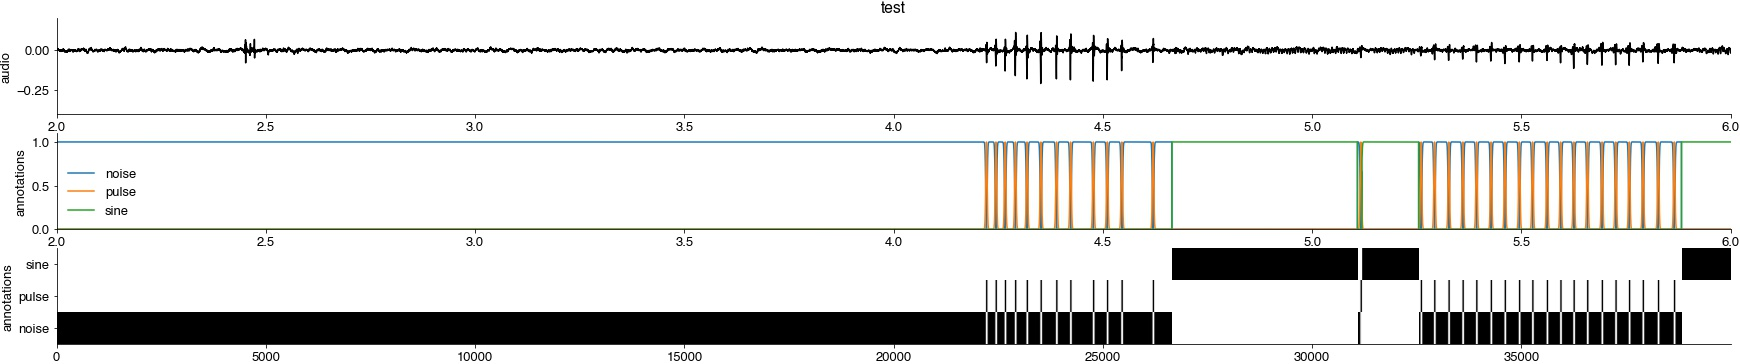

In [4]:
start_seconds = 2
duration_seconds = 4
for typ in ['train','val','test']:
    t0_samples = int(start_seconds * ds.attrs['samplerate_x_Hz'])
    t1_samples = int(t0_samples + duration_seconds * ds.attrs['samplerate_x_Hz'])

    tx = np.arange(t0_samples, t1_samples) / ds.attrs['samplerate_x_Hz']
    plt.figure(figsize=(30, 6))
    ax = plt.subplot(311)
    plt.plot(tx, ds[typ]['x'][t0_samples:t1_samples], 'k')
    plt.title(typ)
    plt.ylabel('audio')

    t0_samples = int(start_seconds * ds.attrs['samplerate_y_Hz'])
    t1_samples = int(t0_samples + duration_seconds * ds.attrs['samplerate_y_Hz'])
    ty = np.arange(t0_samples, t1_samples) / ds.attrs['samplerate_y_Hz']
    plt.subplot(312, sharex=ax)
    plt.plot(ty, ds[typ]['y'][t0_samples:t1_samples, :])
    plt.legend(ds.attrs['class_names'])
    plt.ylabel('annotations')
    plt.ylim(0, 1.1)
    
    plt.subplot(313)
    plt.imshow(ds[typ]['y'][t0_samples:t1_samples, :].T.astype(np.float), cmap='Greys')
    plt.yticks(range(len(ds.attrs['class_names'])), labels=ds.attrs['class_names'])
    plt.ylabel('annotations')
    plt.show()
    